# Visualization of particles

## Import packages

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import time

## Classes

In [8]:
class FasterFFMpegWriter(FFMpegWriter):
    '''FFMpeg-pipe writer bypassing figure.savefig.'''
    def __init__(self, **kwargs):
        '''Initialize the Writer object and sets the default frame_format.'''
        super().__init__(**kwargs)
        self.frame_format = 'argb'

    def grab_frame(self, **savefig_kwargs):
        '''Grab the image information from the figure and save as a movie frame.

        Doesn't use savefig to be faster: savefig_kwargs will be ignored.
        '''
        try:
            # re-adjust the figure size and dpi in case it has been changed by the
            # user.  We must ensure that every frame is the same size or
            # the movie will not save correctly.
            self.fig.set_size_inches(self._w, self._h)
            self.fig.set_dpi(self.dpi)
            # Draw and save the frame as an argb string to the pipe sink
            self.fig.canvas.draw()
            self._frame_sink().write(self.fig.canvas.tostring_argb())
        except (RuntimeError, IOError) as e:
            out, err = self._proc.communicate()
            raise IOError('Error saving animation to file (cause: {0}) '
                      'Stdout: {1} StdError: {2}. It may help to re-run '
                      'with --verbose-debug.'.format(e, out, err))

## Variables
Change these variables to change the settings for the animation

In [30]:
save_video = True
step = 10
fps = 30    # Frames per second
dpi = 300   # Dots per inch (i.e. resolution)
#boxsize = [20, 20, 20]   # Length of each side of the box
particlesize = 1            # Size of particles 
filename = "../Optimized_program/source/position_data.txt"    # Insert file name here (must be txt format)
videoname = "test_animation.mp4"    # Name of the rendered video. Must include file format

## Data Extraction

In [31]:
simulation = []
with open(filename) as txtdata:
    for frame in txtdata.readlines()[1::step]:
        frame_arr = []
        for particle in frame.split('\t')[:-1]:
            frame_arr.append(np.array([coord for coord in particle.split(' ')], dtype=float))
        simulation.append(frame_arr)

simulation = np.array(simulation)
print("Number of frames:", simulation.shape[0],
      "\nNumber of particles:", simulation.shape[1],
      "\nNumber of dimensions:", simulation.shape[2])

Number of frames: 1000 
Number of particles: 200 
Number of dimensions: 3


## Animation

<IPython.core.display.Javascript object>


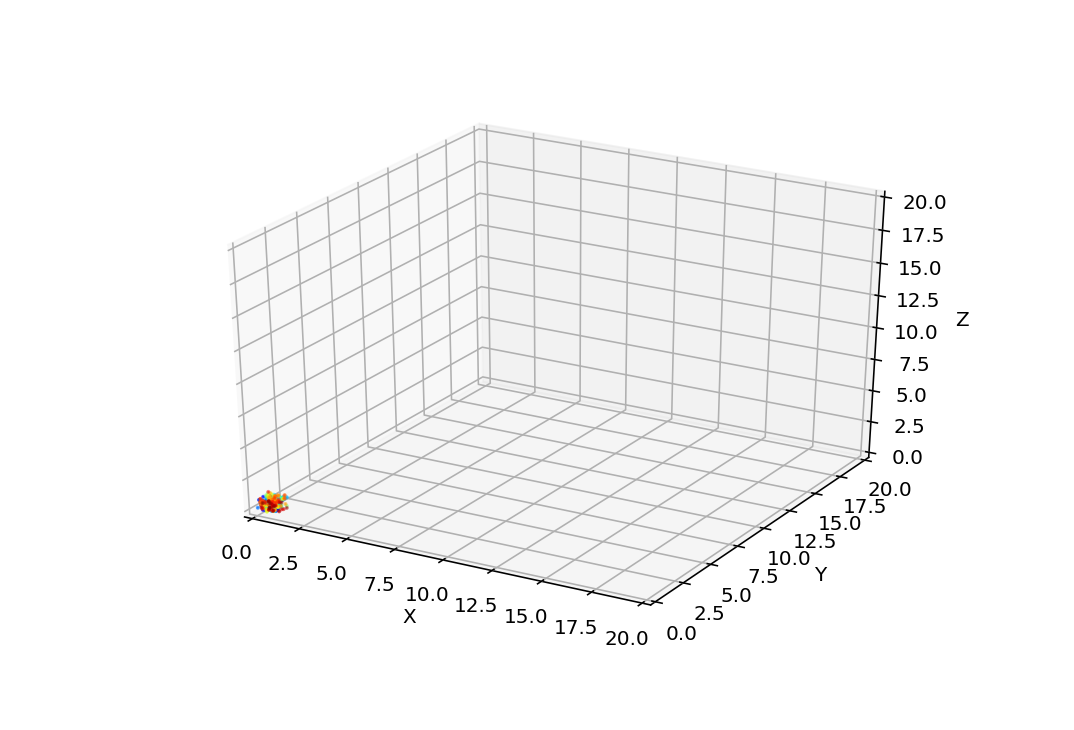

time taken to render video: 0.060254812240600586 s


In [28]:
frames = []
fig = plt.figure()
ax = plt.axes(projection='3d')
color = np.arange(simulation.shape[1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

before = time.time()
scatter = ax.scatter(simulation[1,:,0], simulation[1,:,1], simulation[1,:,2], s=particlesize, c=color, cmap='jet', animated=True)
for frame in simulation[1:]:
    scatter.set_offsets([frame[:, 0], frame[:, 1], frame[:, 2]])
    writer.grab_frame()
    frames.append([scatter])
after = time.time()

print("time taken to render video:", after - before, "s")
interval = int(1/fps*1000)
ani = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat=False)
HTML(ani.to_html5_video())

time taken to render video: 10.91101622581482 s


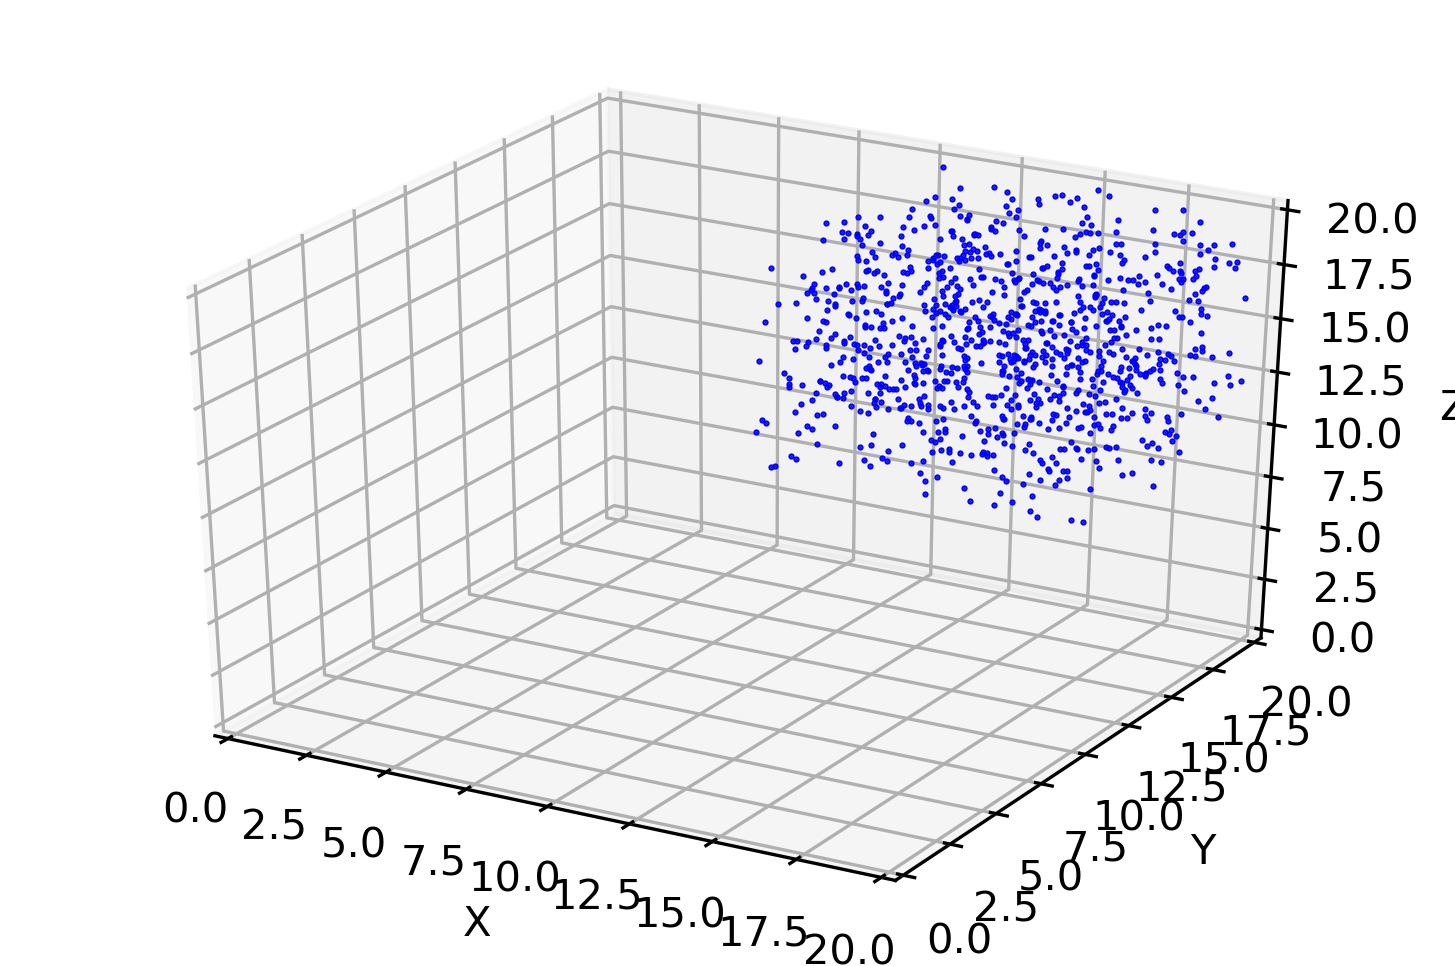

In [32]:
frames = []
fig = plt.figure()
ax = plt.axes(projection='3d')

Writer = animation.writers['ffmpeg']
writer = FasterFFMpegWriter(fps=fps)

ax.set_xlim(0, boxsize[0])
ax.set_xlabel('X')
ax.set_ylim(0, boxsize[1])
ax.set_ylabel('Y')
ax.set_zlim(0, boxsize[2])
ax.set_zlabel('Z')

plot = ax.plot([], [], [], '.', ms=particlesize, c=color)[0]
before = time.time()
with writer.saving(fig, "../videos/" + videoname, dpi=dpi):
    #scatter = ax.scatter(frame[:, 0], frame[:, 1], frame[:, 2], s=particlesize, c=color)
    for frame in simulation:
        plot.set_data(frame[:, 0], frame[:, 1])
        plot.set_3d_properties(frame[:, 2])
        writer.grab_frame()
        #frames.append([scatter])
after = time.time()

print("time taken to render video:", after - before, "s")
#interval = int(1/fps*1000)
#ani = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat=False)

#if save_video:
#    before = time.time()
#    ani.save(f'../videos/{videoname}', dpi=dpi, writer=writer)
#    after = time.time()
#    print("time taken to render video:", after - before, "s")

# Random data generator

In [5]:
nparticles = 1000
nframes = 1000
a = np.random.uniform(0, 10, size=(nparticles, 3))
with open(filename, 'w') as txt:
    for i in range(nframes):
        a += 0.1
        for col in a:
            for i in col:
                txt.write(str(i) + " ")
            txt.write("\t")
        txt.write("\n")